# SSA

In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

## Temperature

In [2]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined_temp.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,1,054.0 056.0,NaN,NaN,8.414828,33.770571,NaN,NaN,NaN,NaN,...,3,60,38.833333,-124.083333,17958.0,18.0,NaN,NaN,NaN,NaN
1,2,052.0 075.0,NaN,NaN,6.612188,33.811156,NaN,NaN,NaN,NaN,...,3,60,38.583333,-125.800000,17958.0,5.0,NaN,NaN,NaN,NaN
2,3,051.0 085.0,NaN,NaN,7.291935,33.505419,NaN,NaN,NaN,NaN,...,3,61,38.475000,-126.666666,17959.0,5.0,NaN,NaN,NaN,NaN
3,4,050.0 095.0,NaN,NaN,7.437742,33.563267,NaN,NaN,NaN,NaN,...,3,61,38.333333,-127.516666,17959.0,8.0,NaN,NaN,NaN,NaN
4,5,050.0 104.0,NaN,NaN,8.095385,33.438200,NaN,NaN,NaN,NaN,...,3,61,38.233333,-128.366666,17959.0,13.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35384,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
35385,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
35386,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
35387,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [159]:
# data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
# data

In [3]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Julian_Date', 'T_degC']]

,Julian_Date,T_degC
27,17957.0,9.122188
0,17958.0,8.414828
30,17958.0,8.997188
28,17958.0,10.742083
29,17958.0,8.352187
...,...,...
35355,44329.0,12.887538
35354,44329.0,12.847083
35356,44329.0,10.221739
35353,44329.0,15.534375


In [5]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', values='T_degC')
data_chla

,T_degC
Julian_Date,
17957.0,9.122188
17958.0,8.623695
17959.0,8.226412
17960.0,8.943615
17961.0,9.089096
...,...
44325.0,12.212297
44326.0,10.445125
44327.0,10.633449


In [6]:
# Filter columns that have more than 150 non-null values
filtered_data = data_chla.dropna()
filtered_data

,T_degC
Julian_Date,
17957.0,9.122188
17958.0,8.623695
17959.0,8.226412
17960.0,8.943615
17961.0,9.089096
...,...
44325.0,12.212297
44326.0,10.445125
44327.0,10.633449


In [7]:
# normalize the data
filtered_data = (filtered_data - np.mean(filtered_data))/np.std(filtered_data)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,T_degC
Julian_Date,
17957.0,-1.139750
17958.0,-1.395067
17959.0,-1.598547
17960.0,-1.231211
17961.0,-1.156699


(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, -6.0, '−6'),
  Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

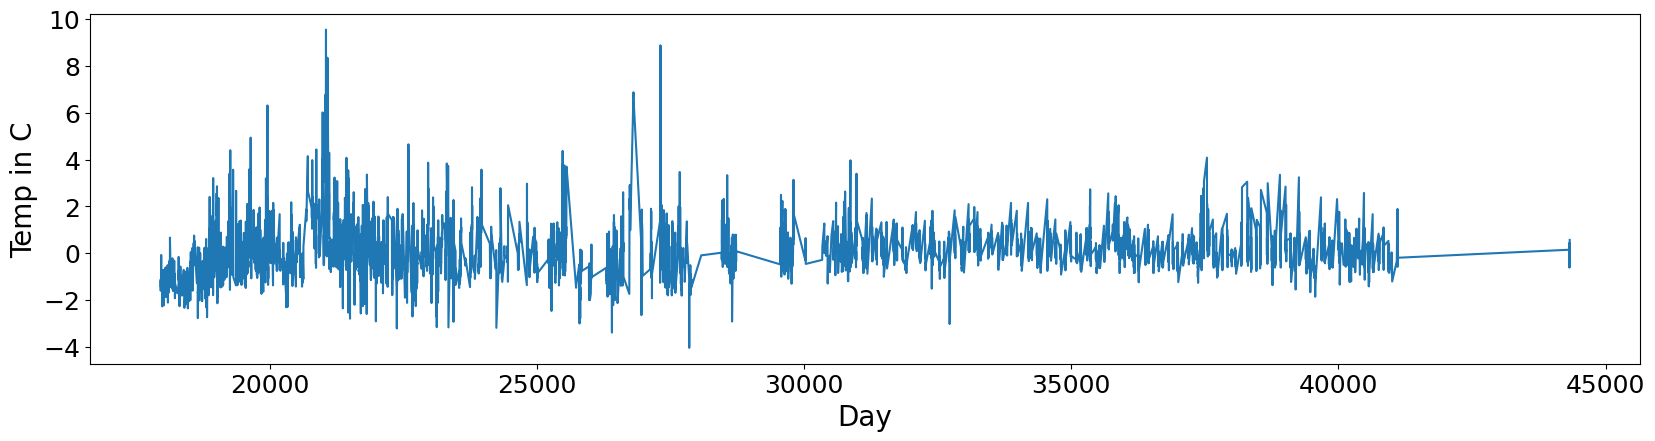

In [8]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [9]:
# # drop nas
# filtered_data = filtered_data.dropna(subset=['090.0 037.0'])
# filtered_data

In [33]:
#prep for SSA

L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['T_degC'].values[kk:kk+L]

filtered_data['T_degC'].values[kk:kk+L]

KeyError: 'T_degC'

In [11]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

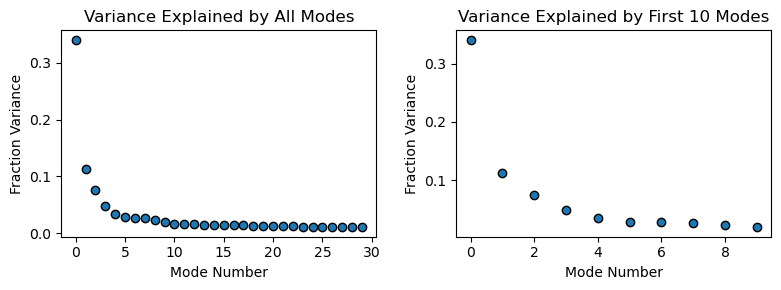

In [12]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 10
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

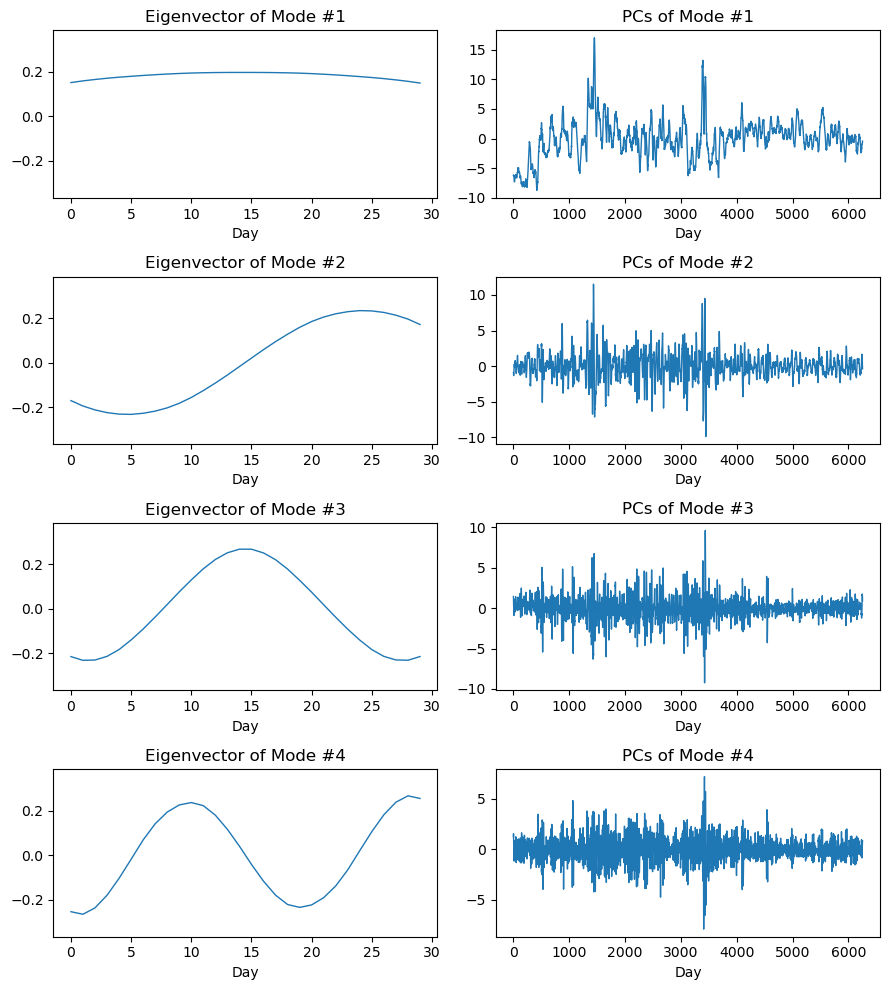

In [13]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 4
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

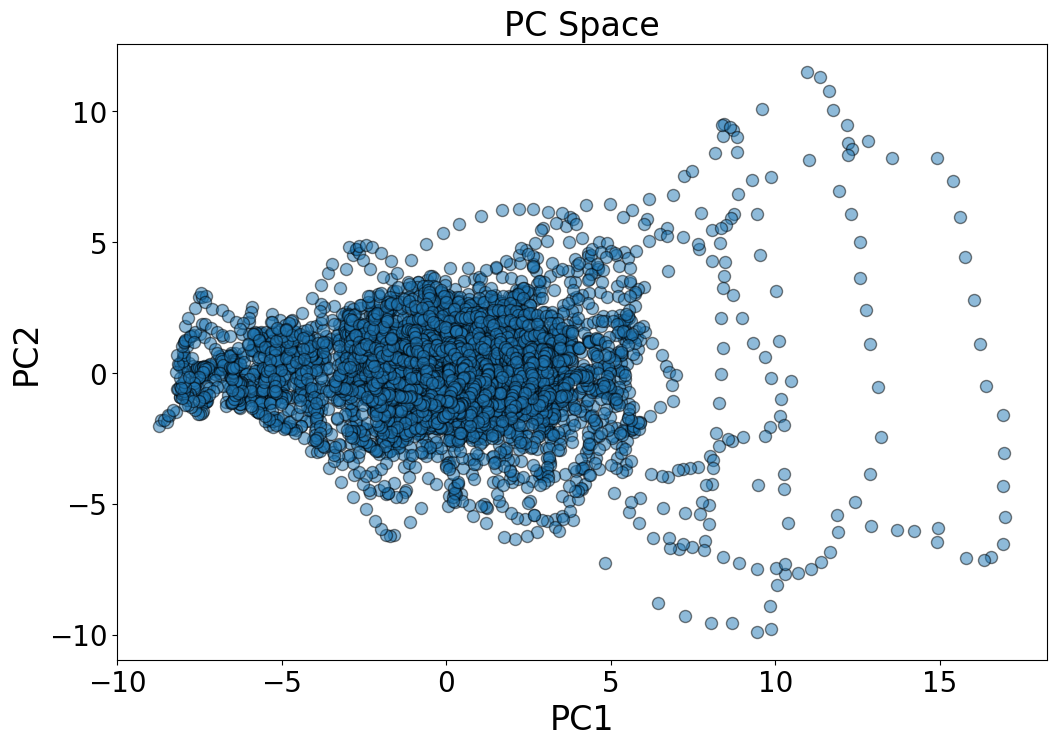

In [14]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')

## Chlorophyll A

In [15]:
# read in the data
data = pd.read_csv('Datasets/calcofi_combined.csv')
data

,Cst_Cnt,Sta_ID,ChlorA,Phaeop,T_degC,Salnty,O2ml_L,PO4uM,SiO3uM,NO3uM,...,Month,Julian_Day,Lat_Dec,Lon_Dec,Julian_Date,Wind_Spd,Wave_Ht,Dry_T,Wave_Prd,Barometer
0,18832,133.0 035.0,0.650000,0.425000,13.172667,34.336533,2.785000,NaN,NaN,14.103333,...,3,67,25.850000,-113.500000,26731.0,12.0,3.0,19.0,6.0,1001.6
1,18833,142.7 008.0,2.483333,1.103333,16.316316,34.930211,2.298421,NaN,27.489474,NaN,...,3,69,25.026666,-110.750000,26733.0,7.0,NaN,19.2,NaN,1001.7
2,18834,142.0 008.0,0.240000,3.330000,14.762400,34.833250,2.067200,NaN,NaN,NaN,...,3,69,25.093333,-110.783333,26733.0,4.0,1.0,20.6,3.0,1001.7
3,18835,120.0 010.0,2.425000,2.483000,15.270000,NaN,3.535000,1.812000,31.675000,NaN,...,3,70,28.856666,-113.258333,26734.0,15.0,1.0,18.8,1.0,1001.0
4,18836,120.0 009.0,5.540909,2.557273,14.281923,NaN,2.874615,NaN,NaN,NaN,...,3,71,28.878333,-113.191666,26735.0,10.0,1.0,18.9,2.0,1000.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13929,35640,093.3 060.0,0.441000,0.272333,10.189478,26.013475,3.393522,1.753478,27.994783,21.642174,...,5,125,31.846300,-119.565900,44321.0,3.0,2.0,14.2,8.0,1015.8
13930,35641,093.3 070.0,0.296533,0.130800,10.864045,25.739976,3.831318,1.485909,23.364091,17.431364,...,5,126,31.515130,-120.240520,44322.0,7.0,NaN,13.6,NaN,1015.4
13931,35642,093.3 080.0,0.214667,0.107533,10.590261,25.814580,3.374952,1.610000,27.298182,19.575000,...,5,126,31.176820,-120.920900,44322.0,6.0,NaN,12.7,NaN,1016.9
13932,35643,093.3 090.0,0.235235,0.112588,10.446458,25.826096,3.724625,1.532917,26.943333,18.801250,...,5,126,30.846380,-121.589030,44322.0,7.0,3.0,13.1,8.0,1017.6


In [16]:
# data['Sta_ID'] = data['Sta_ID'].str.split().str[0]
# data

In [17]:
# sort the data
data_sorted = data.sort_values(by=['Julian_Date'], ascending = True)

# Check the sorted data
data_sorted[['Julian_Date', 'ChlorA']]

,Julian_Date,ChlorA
0,26731.0,0.650000
1,26733.0,2.483333
2,26733.0,0.240000
3,26734.0,2.425000
10,26735.0,6.092727
...,...,...
13900,44329.0,1.018909
13899,44329.0,0.599818
13897,44329.0,0.931000
13890,44329.0,3.092000


In [18]:
# data_chla = data_sorted.pivot_table(index='Julian_Date', columns='Sta_ID', values='ChlorA')
data_chla = data_sorted.pivot_table(index='Julian_Date', values='ChlorA')
data_chla.head()

,ChlorA
Julian_Date,
26731.0,0.650000
26733.0,1.361667
26734.0,2.425000
26735.0,5.220922
26737.0,9.948639


In [19]:
# # Filter columns that have more than 150 non-null values
# filtered_data = data_chla.loc[:, data_chla.notnull().sum(axis=0) > 171]
# filtered_data

In [23]:
# normalize the data
filtered_data = (data_chla - np.mean(data_chla))/np.std(data_chla)
filtered_data.head()

/Users/andreajackman/miniconda3/envs/eosc410/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,ChlorA
Julian_Date,
26731.0,0.053792
26733.0,0.789839
26734.0,1.889600
26735.0,4.781305
26737.0,9.670984


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14')])

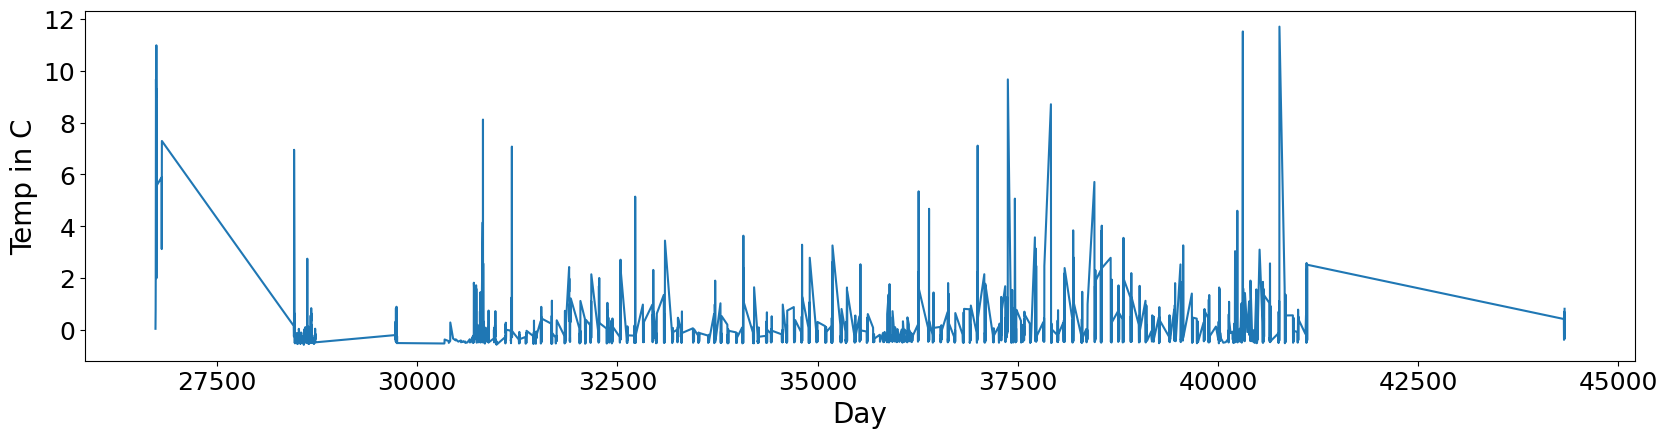

In [24]:
# plot the data over time
saveIt = 0

plt.figure(figsize = (20,10))

plt.subplot(211)
plt.plot(filtered_data)
plt.ylabel('Temp in C', fontsize = 20)
plt.xlabel('Day', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)

In [25]:
# drop nas
filtered_data = filtered_data.dropna()
filtered_data

,ChlorA
Julian_Date,
26731.0,0.053792
26733.0,0.789839
26734.0,1.889600
26735.0,4.781305
26737.0,9.670984
...,...
44325.0,0.710593
44326.0,0.168100
44327.0,-0.340927


In [26]:
#prep for SSA
L = 30
n_obs = np.shape(filtered_data)[0] - L + 1
SSA_input = np.empty((n_obs, L))

for kk in range(n_obs):
    SSA_input[kk,:] = filtered_data['ChlorA'].values[kk:kk+L]

filtered_data['ChlorA'].values[kk:kk+L]

array([ 0.51877764,  0.41733417, -0.1481341 ,  0.57724195, -0.33974553,
       -0.36063879, -0.48286612, -0.46800748, -0.21571991, -0.26887789,
        2.58923981,  0.1239484 , -0.46069167, -0.46915299,  0.12949138,
        2.372853  ,  1.35574551, -0.39314627, -0.34618414,  2.52148604,
        0.43029071, -0.20195156, -0.37246785, -0.32266391,  0.20322501,
        0.71059324,  0.16809953, -0.34092704, -0.17955412,  0.82427487])

In [27]:
#do SSA (PCA on the lagged matrix)
n_modes = np.min(np.shape(SSA_input))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(SSA_input)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

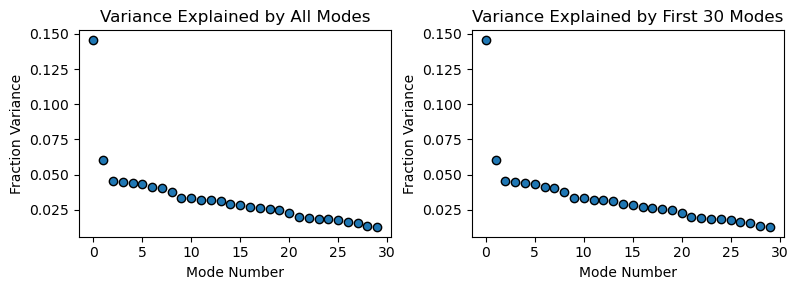

In [30]:
#plot fraction of variance explained by each mode

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

ax[0].scatter(range(len(fracVar)),fracVar, edgecolor = 'k')
ax[0].set_xlabel('Mode Number')
ax[0].set_ylabel('Fraction Variance')
ax[0].set_title('Variance Explained by All Modes')

n_modes_show = 30
ax[1].scatter(range(n_modes_show),fracVar[:n_modes_show], edgecolor = 'k')
ax[1].set_xlabel('Mode Number')
ax[1].set_ylabel('Fraction Variance')
ax[1].set_title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

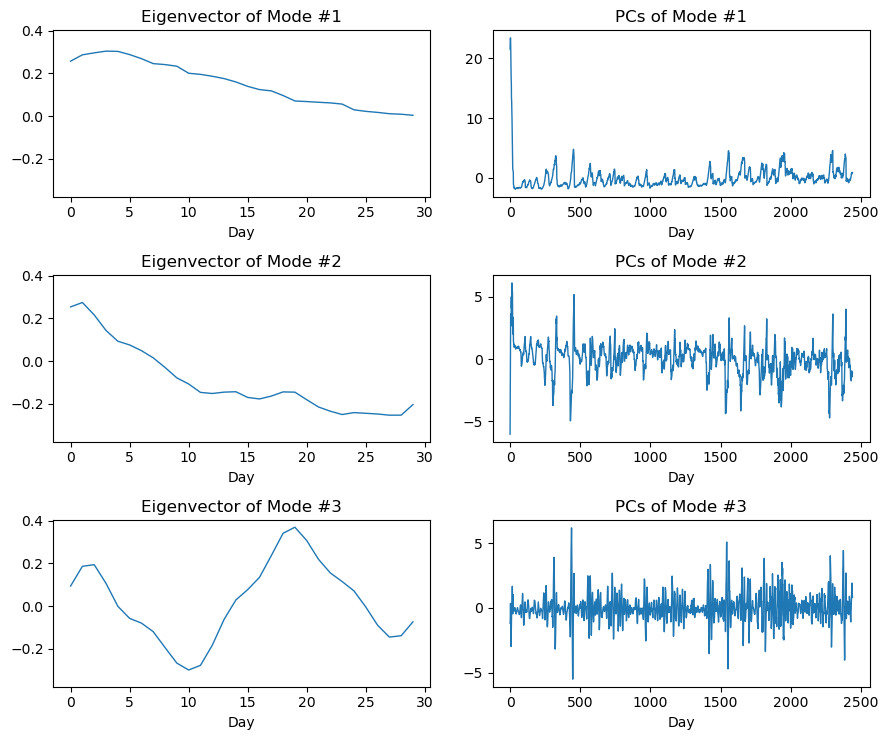

In [31]:
#plot the first n modes and PCs -- choose a value of 'n' from the variance explained figure!
n = 3
fig, ax = plt.subplots(n, 2, figsize=(9, 2.5*n))

for kk in range(n):
    ax[kk, 0].plot(eigvecs[kk], lw=1)
    ax[kk, 0].set_ylim((np.min(eigvecs),np.max(eigvecs)))
    ax[kk, 0].set_xlabel('Day')
    ax[kk, 0].set_title('Eigenvector of Mode #'+str(kk+1))

    ax[kk, 1].plot(PCs[:,kk], lw=1)
    ax[kk, 1].set_title('PCs of Mode #' + str(kk+1))
    ax[kk, 1].set_xlabel('Day')

plt.tight_layout()

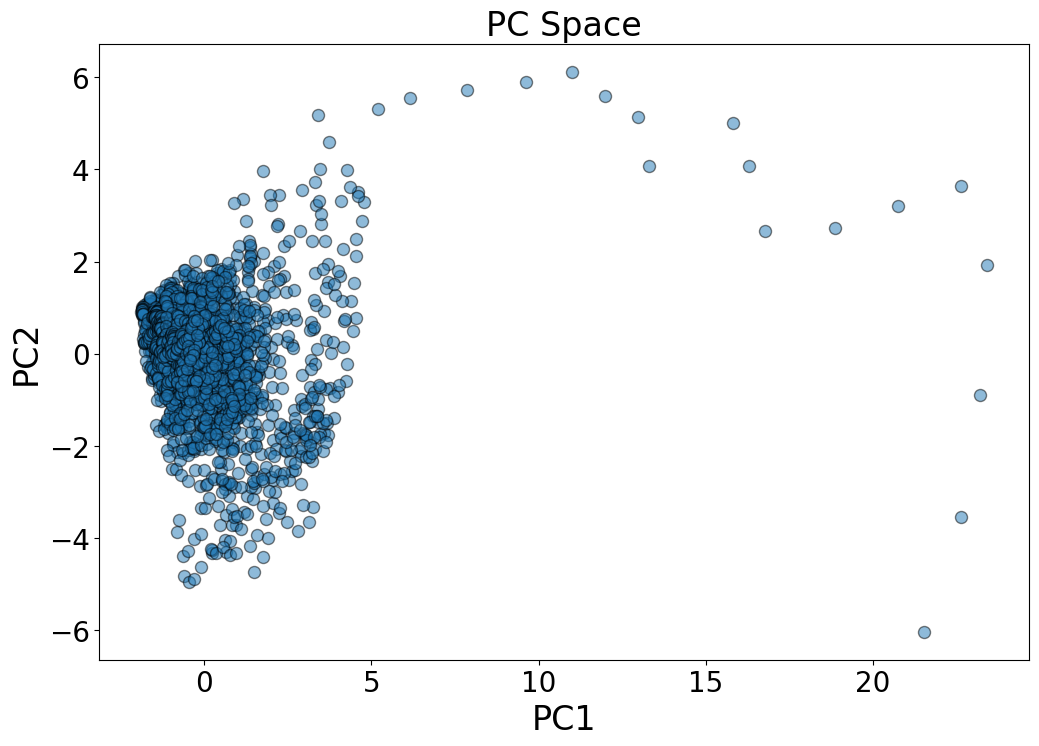

In [32]:
#visualize PC-space

saveIt = 1

plt.figure(figsize = (12,8))

plt.scatter(PCs[:,0],PCs[:,1], s = 75, alpha = 0.5, edgecolor = 'k')
plt.ylabel('PC2', fontsize = 24)
plt.xlabel('PC1', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('PC Space', fontsize = 24)

if saveIt:
    plt.savefig('tutorial6_fig5.png')